In [1]:
from pandas import *
from numpy import *
import pprint 

In [2]:
# y = b + mx
# the algorithm starts from a random set of parameters and move along the direction, given by gradient, that minimizes /
# the error funcetion to reach the optimized set of parameters 
# gradient descent/ first order iterative optimization algorithm Xn+1 = Xn - learningrate * Gradient(f(Xn))


In [3]:
# function returns mean squared error 
def error_for_line_given_points(b, m, points):
    totalError =0 
    for i in range(len(points)):
        x = points[i][0]
        y = points[i][1]
        totalError += (y - (b + m*x))**2
    return totalError

# MSE = totalError/ len(points)

In [4]:
# according to the partial differentiation of error function to b and m 
def step_gradient(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = len(points)
    # iterate over each training data point for the current b and m optimization 
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]   

In [5]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

In [6]:
def run():
    points = genfromtxt("data.csv", delimiter=",")
    # p = pandas.read_csv("data.csv", delimiter=",", header = None)
    
    learning_rate = 0.0001
    # initial set of parameters 
    initial_b = 0
    initial_m = 0 
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, error_for_line_given_points(initial_b, initial_m, points)/len(points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, error_for_line_given_points(b, m, points)/len(points))
)

In [7]:
if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


#### Convexity. Our error surface was convex. Regardless of where we started, we would eventually arrive at the absolute minimum. In general, this need not be the case. It’s possible to have a problem with local minima that a gradient search can get stuck in. There are several approaches to mitigate this (e.g., stochastic gradient search).

#### Performance. We used vanilla gradient descent with a learning rate of 0.0005 in the above example, and ran it for 2000 iterations. There are approaches such a line search, that can reduce the number of iterations required. For the above example, line search reduces the number of iterations to arrive at a reasonable solution from several thousand to around 50.

#### Convergence. We didn’t talk about how to determine when the search finds a solution. This is typically done by looking for small changes in error iteration-to-iteration (e.g., where the gradient is near zero).

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from IPython import display

In [34]:
data = pd.read_csv('data.csv', delimiter= ',', header = None,)

In [35]:
data.describe()

,0,1
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [36]:
data.columns = ['x', 'y']
data.tail(5)
# data.columns.values

,x,y
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


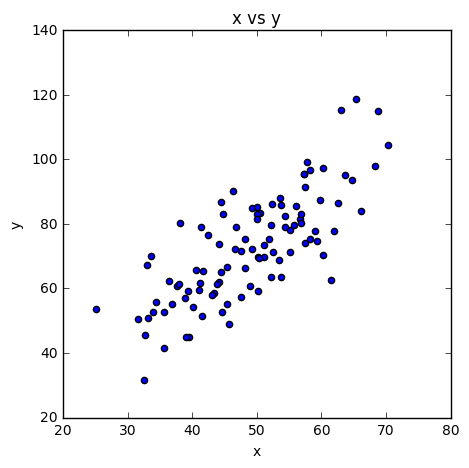

In [37]:
plt.figure(figsize = (5,5))
plt.title('x vs y')
plt.scatter(x = data.iloc[:,0], y = data.iloc[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
# data.iloc[row, column]
# data.iloc[:,1]

In [39]:
# rows 
data[:1]

,x,y
0,32.502345,31.707006


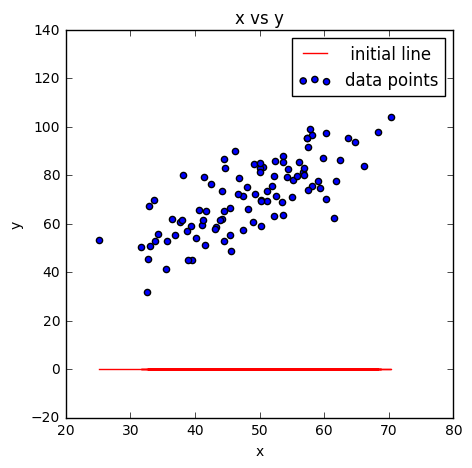

In [40]:
# initially all parameters are set to 0
b = 0
m = 0
fig = plt.figure(figsize = ((5,5)))
ax = fig.add_subplot(1,1,1)
ax.set_title('x vs y')
ax.scatter(x = data.iloc[:,0], y = data.iloc[:,1], label = 'data points')
plt.plot(data.iloc[:,0], b + m*data.iloc[:,1], color = 'red', label = ' initial line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc = 'best')
plt.show()

In [41]:
points = genfromtxt("data.csv", delimiter=",")
learning_rate = 0.0001
# initial set of parameters 
initial_b = 0
initial_m = 0 
num_iterations = 1000
b_list, m_list, SSE = coefficient_and_error_runner(points, initial_b, initial_m, learning_rate, num_iterations)

In [58]:
# store coefficients and MSE in each iteration 
def coefficient_and_error_runner(points, starting_b, starting_m, learning_rate, num_iterations):

    b = starting_b
    m = starting_m
    b_list = [starting_b]
    m_list = [starting_m]
    MSE = [error_for_line_given_points(starting_b, starting_m, points)/len(points)]

    for i in range(num_iterations):
        b_new,m_new = step_gradient(b, m, points, learning_rate)
        SSE = error_for_line_given_points(b_new, m_new, points)
        MSE_i = SSE/len(points)
        b_list.append(b_new)
        m_list.append(m_new)
        MSE.append(MSE_i)
        b = b_new
        m = m_new
#         print('at iteration {0}, linear function looks like y = {1} + {2} *x'.format(i, b_new, m_new)) 
    return b_list, m_list, MSE

In [59]:
points = genfromtxt('data.csv', delimiter= ',')

learning_rate = 0.0001
# initial set of parameters 
initial_b = 0
initial_m = 0 
num_iterations = 1000
b_list, m_list, MSE = coefficient_and_error_runner(points, initial_b, initial_m, learning_rate, num_iterations)

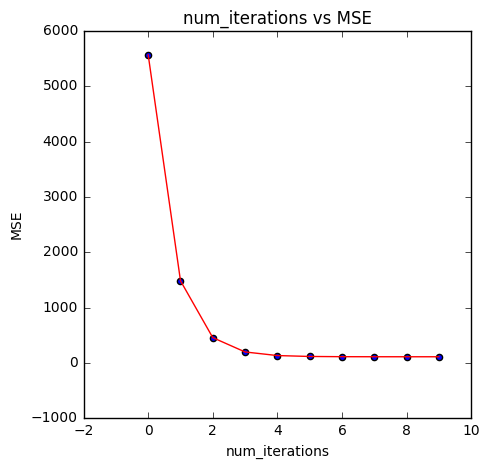

In [99]:
# residual analysis
fig = plt.figure(figsize = (5,5))
# from the previous function, MSE does nto decrese much after the 10th iteration 
ax = fig.add_subplot(1,1,1)
ax.scatter(x = [x for x in range(10)], y = MSE[0:10])
ax.set_xlabel('num_iterations')
ax.set_ylabel('MSE')
ax.set_title('num_iterations vs MSE')
plt.plot([x for x in range(10)], MSE[0:10], color = 'red')
plt.show()

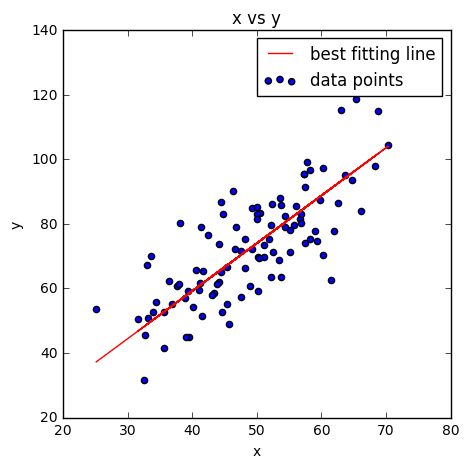

In [107]:
# visulaize the best fitting line
b_best = b_list[1000]
m_best = m_list[1000]

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(data.iloc[:,0], data.iloc[:,1], label = 'data points')
plt.plot(data.iloc[:,0], b_best + m_best * data.iloc[:,0], color = 'red', label = 'best fitting line')
ax.set_title('x vs y')
ax.legend(loc = 'best')
plt.show()

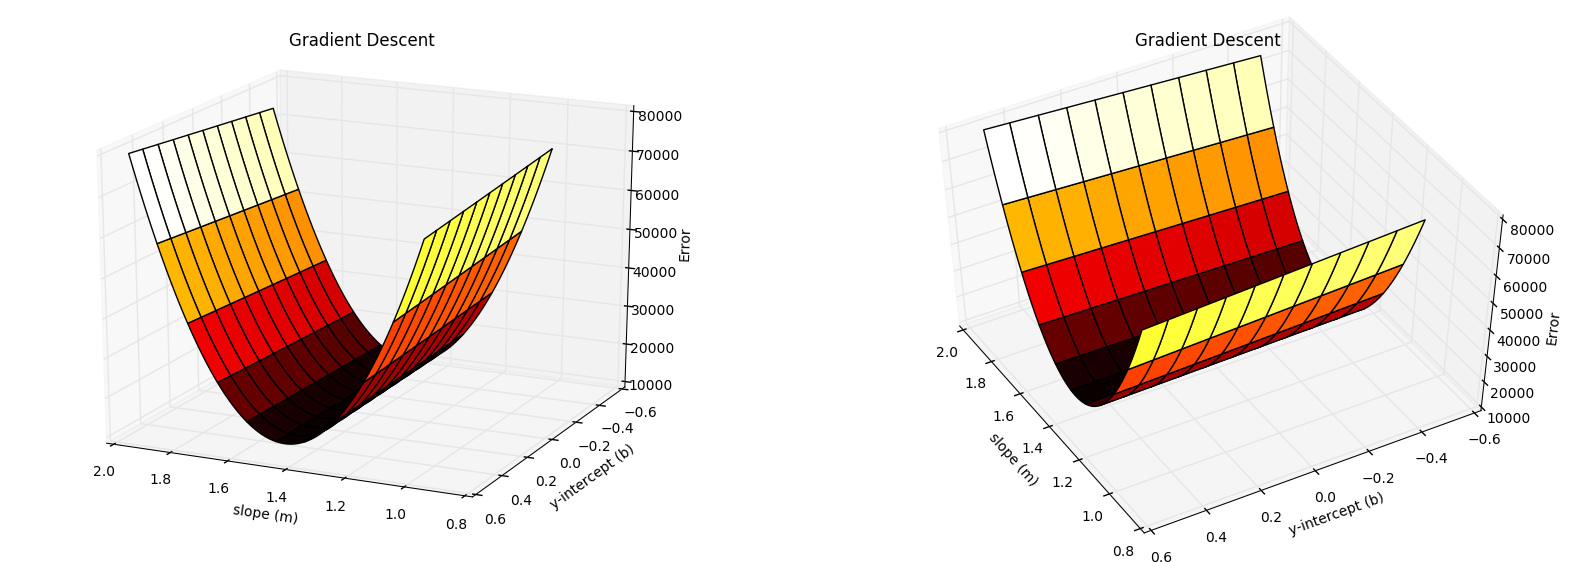

In [110]:
# visualize error surface 
from mpl_toolkits.mplot3d import Axes3D

# return totalError calculated from the function defined before
def error(m, b):
    return error_for_line_given_points(b, m, points)

m = np.arange(1,2,0.01)
b = np.arange(-0.5,0.5,0.01)


fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

#PLOT2
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')


plt.show()


In [122]:
# visualize gradient search and intermediate lines 
def make_plots(fig,axes,m_list,b_list,m,b,data,step):
    
    #PLOT1
    ax = axes[1]
    ax.set_title('ADR vs Rating (CS:GO)')
    ax.set_xlim(0,160)
    ax.set_ylim(0,250)
    ax.set_xlabel('ADR')
    ax.set_ylabel('Rating')
    
    ax.scatter(data.iloc[:,0], data.iloc[:,1],label='Data')
    ax.plot(data.iloc[:,0], m*data.iloc[:,0] + b,color='red',label='First Fitting Line (Step %d)' % step)
    
    ax.legend(loc='best')
    
    #PLOT2
    ax2 = axes[0]
    ax2.cla()
    
    ax2.set_title('Gradient Search')
    ax2.set_xlim(0.9,1.5)
    ax2.set_ylim(0.999,1.006)
    ax2.set_xlabel('slope (m)')
    ax2.set_ylabel('y intercept (b)')
    
    ax2.text(-1.15, 0.97, 'Iteration: '+str(step),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    ax2.text(-1.15, 0.93, 'm = '+str(round(m,3))+', b = '+str(round(b,3)),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    
    ax2.plot(m_list,b_list,color='black',linewidth=0.5)
    ax2.scatter(m,b,marker='^')    
    
    fig.canvas.draw()
    

def gradient_descent_n_steps_with_plot(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    
    fig,axes = plt.subplots(1,2,figsize=(10,7))
    
    m_list = [m_starting]
    b_list = [b_starting]
    m = m_starting
    b = b_starting
    plt.cla()
    for i in range(steps):
        step = i
        make_plots(fig,axes,m_list,b_list,m,b,data,step)
        
        m,b = step_gradient(m,b,data, learning_rate = 0.001)
        m_list.append(m)
        b_list.append(b)
        
        time.sleep(10/steps)
        plt.cla()
        #############
            
    make_plots(fig,axes,m_list,b_list,m,b,data,step)


KeyError: (0, 0)

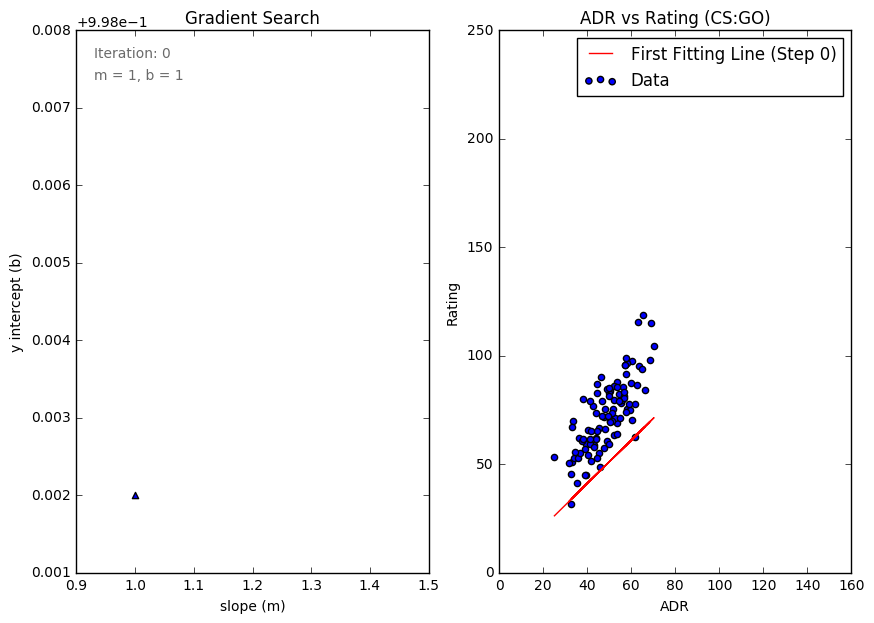

In [123]:
#RUN IT!
m = 1
b = 1
steps = 10
gradient_descent_n_steps_with_plot(m,b,data,steps)